In [173]:
import pandas as pd 
import numpy as np

In [174]:
df=pd.read_csv(r'C:/Users/faisal/OneDrive/Desktop/data_science work/Deep-Learning/Datasets/spam.csv',
               encoding='ISO-8859-1')

In [175]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [176]:
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [177]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [178]:
df.columns = ['labels','msg']

In [179]:
df.head()

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
df.describe()

,labels,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Data-Cleaning

In [181]:
import re #regular expression
import nltk #basic nlp library

In [182]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  #library for Stemming

In [183]:
ps=PorterStemmer()

In [184]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['msg'][i]) #replacing all the character except small a-z & capital A-Z with space.
    review=review.lower() #it will covert every letter in lowercase
    review=review.split()
    
    review=[ps.stem(word)for word in review if not word in stopwords.words('english')] #it will check every word if is it in stopword library or not if not then it will be added in review
    review=' '.join(review) #joint all the list of words into sentences
    corpus.append(review) #after joininng it will append into corpus
    

# Creating-Bag-of-Words-Model

In [185]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000) #it will take only 5000 feature that are our wordsfrom the total
                                            #because few of the repeated many times.
x=cv.fit_transform(corpus).toarray()


In [186]:
df.head()

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [187]:
df['labels']=df['labels'].map({'ham':0,'spam':1})
y=df[['labels']]

In [188]:
print(y)

      labels
0          0
1          0
2          1
3          0
4          0
...      ...
5567       1
5568       0
5569       0
5570       0
5571       0

[5572 rows x 1 columns]


# Train_Test_Split

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Training the model using Naive Bayes classification

In [190]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB()

In [191]:
spam_detect_model.fit(x_train,y_train)

C:\Users\faisal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [192]:
y_pred=spam_detect_model.predict(x_test)

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [194]:
cf=confusion_matrix(y_test,y_pred)

In [195]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [196]:
cf

array([[938,  11],
       [  6, 160]], dtype=int64)

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

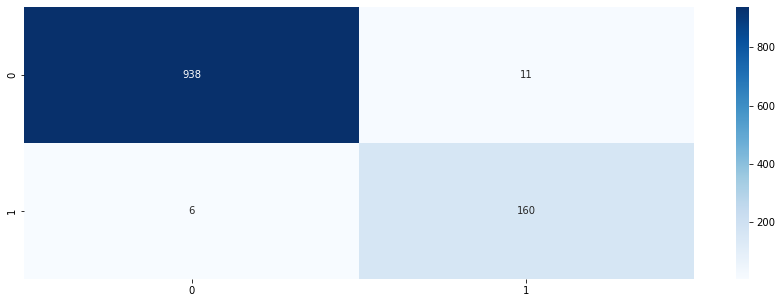

In [198]:
plt.figure(figsize=(15,5))
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
plt.show()

In [199]:
accuracy_score(y_test,y_pred)

0.9847533632286996